In [150]:
# Imports
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import re

In [7]:
df = pd.read_csv('recent-grads.csv')
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
# Data Cleaning
df = df[(df['Major_category'] != 'Interdisciplinary') & (df['Major'] != 'Food Science')]
df['Major'] = df['Major'].str.title()
df['Major'] = df['Major'].apply(lambda s: s.replace('Engineering', 'Eng.'))
df['Major'] = df['Major'].apply(lambda s: s.replace('Communication', 'Comm.'))
df['Major'] = df['Major'].apply(lambda s: s.replace('Administration', 'Admin.'))
df['Major'] = df['Major'].apply(lambda s: s.replace('And', '&'))

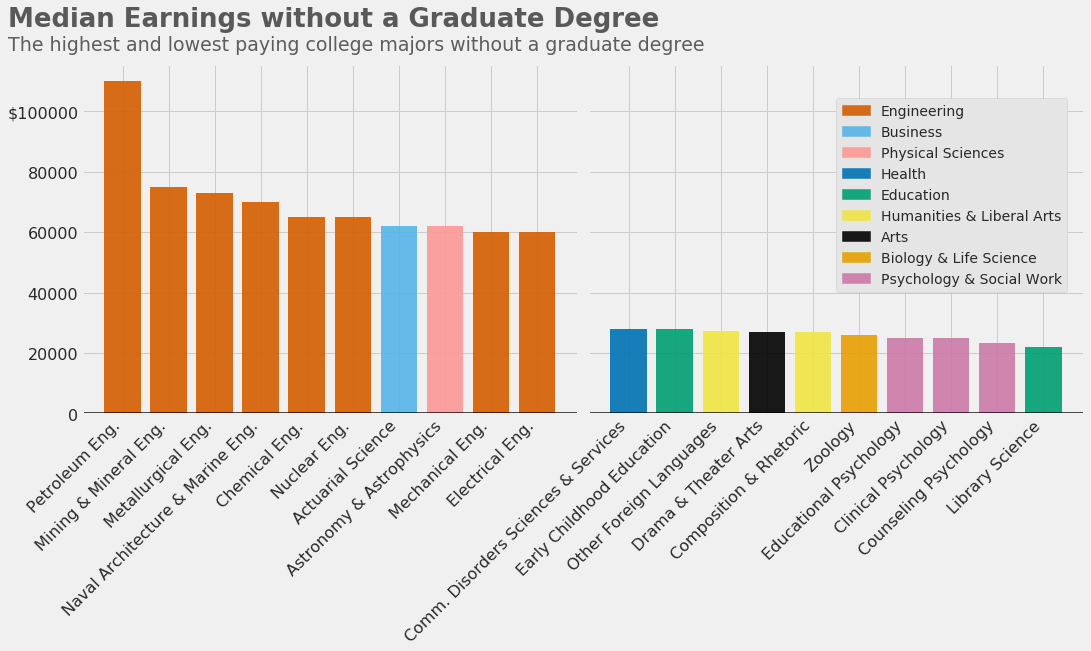

In [68]:
# Graph highest and lowest earning jobs without a graduate degree
colors = {'Arts': [0, 0, 0],
          'Biology & Life Science': [230/255,159/255,0],
          'Business': [86/255,180/255,233/255],
          'Education': [0,158/255,115/255],
          'Engineering': [213/255,94/255,0],
          'Health': [0,114/255,178/255],
          'Humanities & Liberal Arts': [240/255,228/255,66/255],
          'Physical Sciences': [252/255, 153/255, 150/255],
          'Psychology & Social Work': [204/255, 121/255, 167/255]}

df_graph = df.loc[0:9].append(df.tail(10), ignore_index=True)
highest = df_graph.loc[0:9]
lowest = df_graph.tail(10)

f, (ax_h, ax_l) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
ax_h.bar(highest.Major, highest.Median, color=highest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)
ax_l.bar(lowest.Major, lowest.Median, color=lowest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)

plt.setp(ax_h.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax_l.get_xticklabels(), rotation=45, ha='right')
ax_h.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax_l.tick_params(axis = 'both', which = 'major', labelsize = 16)

f.subplots_adjust(wspace=0.02)
style.use('fivethirtyeight')

#Add Bold line at y=0 and format y-axis
ax_h.axhline(y = 0, color = 'black', linewidth = 5, alpha = .7)
ax_l.axhline(y = 0, color = 'black', linewidth = 5, alpha = .7)
ax_h.set_yticklabels(labels = ['0', '20000', '40000', '60000', '80000', '$100000'], color='#292929')
ax_h.tick_params(axis='x', colors='#292929')
ax_l.tick_params(axis='x', colors='#292929')

# Create Legend
han = []
mc = df_graph['Major_category'].unique().tolist()
for cat in mc:
    han.append(mpatches.Patch(color=colors[cat], label=cat, alpha=0.9))

legend = ax_l.legend(handles=han, facecolor='#E5E5E5', framealpha=1, loc=(0.5,0.35), prop={'size':14})
plt.setp(legend.get_texts(), color='#292929')

# Add Titles
ax_h.text(x = -2.5, y = 128000, s = "Median Earnings without a Graduate Degree",
          fontsize = 26, weight = 'bold', color='#595959')
ax_h.text(x = -2.5, y = 120000,
          s='The highest and lowest paying college majors without a graduate degree',
          fontsize = 19, color='#5d5d5d')
# plt.show()
# plt.tight_layout()

plt.savefig('undergrad_earnings.jpg', bbox_inches="tight")

In [131]:
df_grad = pd.read_csv('grad-students.csv')
df_grad.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [132]:
df_grad = df_grad[(df_grad['Major_category'] != 'Interdisciplinary') & (df['Major'] != 'Food Science')]
df_grad['Major'] = df_grad['Major'].str.title()
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Engineering', 'Eng.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Communication', 'Comm.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Administration', 'Admin.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Pharmacy Pharmaceutical', 'Pharmaceutical'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Preparatory', 'Prep.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Organization', 'Org.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('Miscellaneous', 'Misc.'))
df_grad['Major'] = df_grad['Major'].apply(lambda s: s.replace('And', '&'))
df_grad = df_grad.sort_values(by=['Grad_median'], ascending=False)
df_grad = df_grad.reset_index(drop=True)

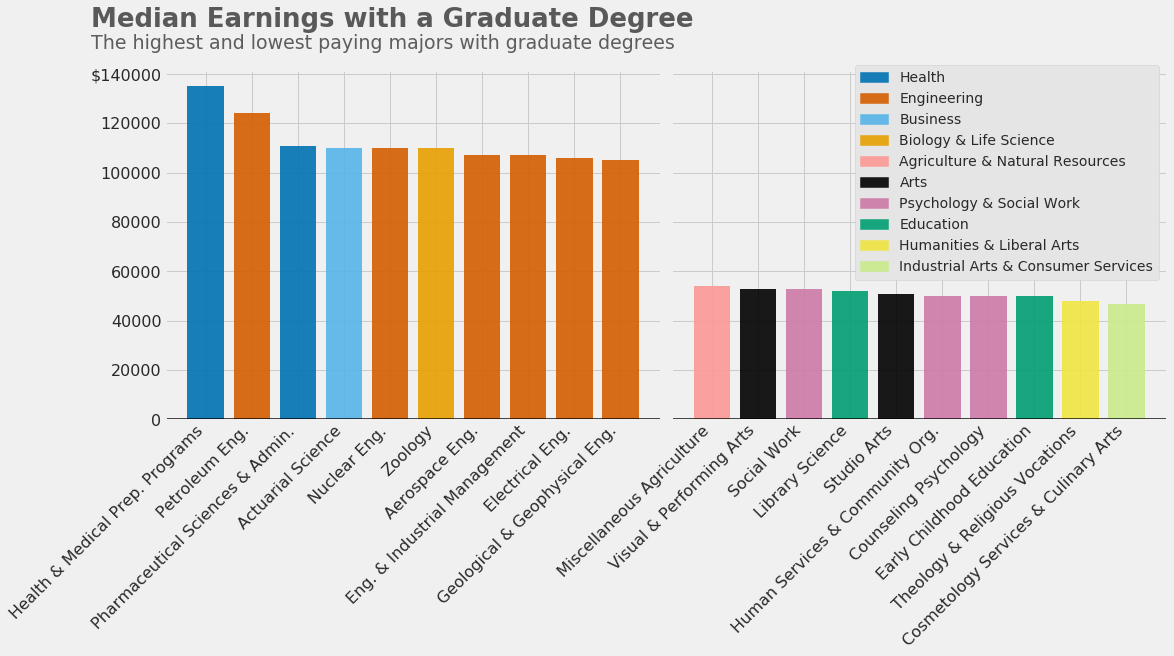

In [69]:
# Graph highest and lowest earning jobs with a Graduate Degree

colors = {'Arts': [0, 0, 0],
          'Biology & Life Science': [230/255,159/255,0],
          'Business': [86/255,180/255,233/255],
          'Education': [0,158/255,115/255],
          'Engineering': [213/255,94/255,0],
          'Health': [0,114/255,178/255],
          'Humanities & Liberal Arts': [240/255,228/255,66/255],
          'Psychology & Social Work': [204/255, 121/255, 167/255],
          'Agriculture & Natural Resources': [252/255, 153/255, 150/255],
          'Industrial Arts & Consumer Services':[202/255, 235/255, 139/255]}

df_graph = df_grad.loc[0:9].append(df_grad.tail(10), ignore_index=True)
highest = df_graph.loc[0:9]
lowest = df_graph.tail(10)

f, (ax_h, ax_l) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
ax_h.bar(highest.Major, highest.Grad_median,
         color=highest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)
ax_l.bar(lowest.Major, lowest.Grad_median,
         color=lowest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)

plt.setp(ax_h.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax_l.get_xticklabels(), rotation=45, ha='right')
ax_h.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax_l.tick_params(axis = 'both', which = 'major', labelsize = 16)

f.subplots_adjust(wspace=0.02)
style.use('fivethirtyeight')

#Add Bold line at y=0 and format y-axis
ax_h.axhline(y = 0, color = 'black', linewidth = 5, alpha = .7)
ax_l.axhline(y = 0, color = 'black', linewidth = 5, alpha = .7)
ax_h.set_yticklabels(labels = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '$140000'], color='#292929')
ax_h.tick_params(axis='x', colors='#292929')
ax_l.tick_params(axis='x', colors='#292929')

# Create Legend
han = []
mc_grad = df_graph['Major_category'].unique().tolist()
for cat in mc_grad:
    han.append(mpatches.Patch(color=colors[cat], label=cat, alpha=0.9))

legend = ax_l.legend(handles=han, facecolor='#E5E5E5', framealpha=1, loc=(0.37,0.4), prop={'size':14})
plt.setp(legend.get_texts(), color='#292929')

# Add Titles
ax_h.text(x = -2.5, y = 159000, s = "Median Earnings with a Graduate Degree", fontsize = 26, weight = 'bold',
          color='#595959')
ax_h.text(x = -2.5, y = 150000,
          s='The highest and lowest paying majors with graduate degrees',
          fontsize = 19, color='#5d5d5d')
# plt.show()
# plt.tight_layout()

plt.savefig('grad_earnings.jpg', bbox_inches="tight")

In [133]:
df_grad['Grad_premium'] = df_grad['Grad_premium'] * 100
df_grad = df_grad.sort_values(by=['Grad_premium'], ascending=False)
df_grad = df_grad.reset_index(drop=True)
df_grad.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,6106,Health & Medical Prep. Programs,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,26320,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,164.705882
1,3609,Zoology,Biology & Life Science,106415,1978,80607,60310,1723,0.020928,110000.0,...,52896,34015,25588,1680,0.047065,55000.0,35000,88000.0,0.667970,100.000000
2,3608,Physiology,Biology & Life Science,59363,1155,50450,38252,1078,0.020921,90000.0,...,34819,25501,18261,1284,0.047937,50000.0,35000,78000.0,0.630301,80.000000
3,3600,Biology,Biology & Life Science,1085977,21994,898342,703347,19368,0.021105,95000.0,...,718231,512669,394936,28639,0.052907,54000.0,37000,80000.0,0.601913,75.925926
4,3601,Biochemical Sciences,Biology & Life Science,128892,2765,109944,90589,2728,0.024212,96000.0,...,58550,43165,34108,2888,0.062710,55000.0,36000,85000.0,0.687637,74.545454


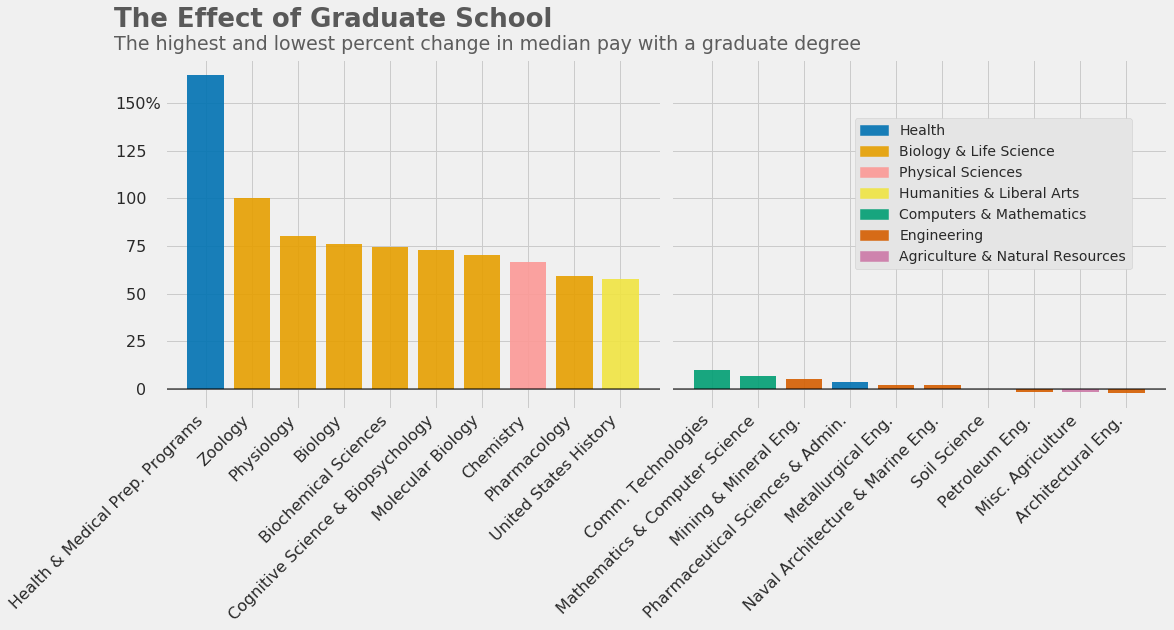

In [151]:
# Graph highest and lowest percent change in median earnings by getting a graduate degree

colors = {'Computers & Mathematics': [0,158/255,115/255],
          'Biology & Life Science': [230/255,159/255,0],
          'Engineering': [213/255,94/255,0],
          'Health': [0,114/255,178/255],
          'Humanities & Liberal Arts': [240/255,228/255,66/255],
          'Physical Sciences': [252/255, 153/255, 150/255],
          'Agriculture & Natural Resources': [204/255, 121/255, 167/255]}

df_graph = df_grad.loc[0:9].append(df_grad.tail(10), ignore_index=True)
highest = df_graph.loc[0:9]
lowest = df_graph.tail(10)

f, (ax_h, ax_l) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
ax_h.bar(highest.Major, highest.Grad_premium,
         color=highest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)
ax_l.bar(lowest.Major, lowest.Grad_premium,
         color=lowest['Major_category'].apply(lambda x: colors[x]), alpha=0.9)

plt.setp(ax_h.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax_l.get_xticklabels(), rotation=45, ha='right')
ax_h.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax_l.tick_params(axis = 'both', which = 'major', labelsize = 16)

f.subplots_adjust(wspace=0.02)
style.use('fivethirtyeight')

#Add Bold line at y=0 and format y-axis
ax_h.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)
ax_l.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)
ax_h.set_yticklabels(labels = ['0   ', '0   ', '25   ', '50   ', '75   ', '100   ', '125   ', '150%'], color='#292929')
ax_h.tick_params(axis='x', colors='#292929')
ax_l.tick_params(axis='x', colors='#292929')

# Create Legend
han = []
mc_grad = df_graph['Major_category'].unique().tolist()
for cat in mc_grad:
    han.append(mpatches.Patch(color=colors[cat], label=cat, alpha=0.9))

legend = ax_l.legend(handles=han, facecolor='#E5E5E5', framealpha=1, loc=(0.37,0.4), prop={'size':14})
plt.setp(legend.get_texts(), color='#292929')

# Add Titles
ax_h.text(x = -2, y = 190, s = "The Effect of Graduate School", fontsize = 26, weight = 'bold',
          color='#595959')
ax_h.text(x = -2, y = 178,
          s='The highest and lowest percent change in median pay with a graduate degree',
          fontsize = 19, color='#5d5d5d')
# plt.show()
# # plt.tight_layout()

plt.savefig('percent_change.jpg', bbox_inches="tight")